In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torchvision.transforms import Compose

from train import transforms
from datasets.ascad import ASCADV1Variable_DS50

In [2]:
dataset = ASCADV1Variable_DS50()
sample_indices = [0, 10, 100, 1000, 10000, 100000]
samples = [dataset[idx][0] for idx in sample_indices]

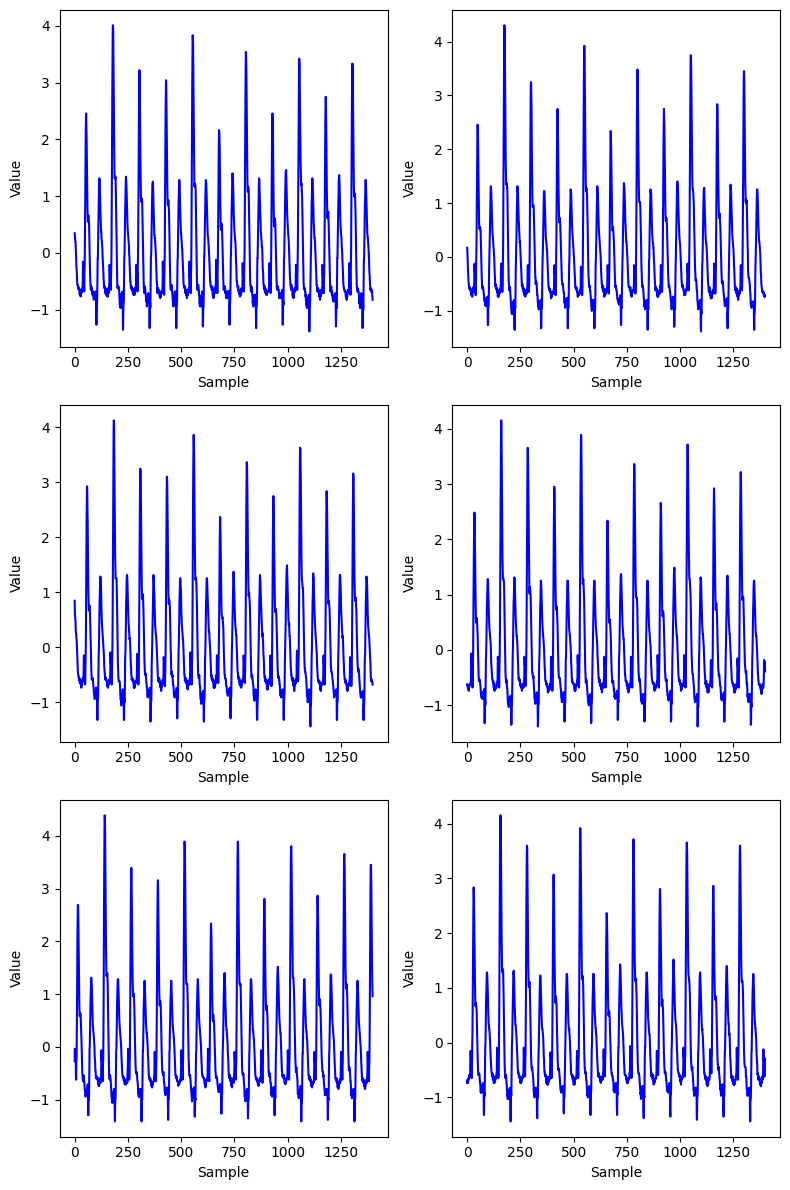

In [3]:
def plot_samples(samples, superimpose=None, show_diff=False):
    fig, axes = plt.subplots(3, 2, figsize=(8, 12))
    for ax, sample in zip(axes.flatten(), samples):
        ax.plot(sample.squeeze(), color='blue')
        ax.set_xlabel('Sample')
        ax.set_ylabel('Value')
    if superimpose is not None:
        for ax, si_sample, sample in zip(axes.flatten(), superimpose, samples):
            ax.plot(si_sample.squeeze(), color='red')
    plt.tight_layout()
plot_samples(samples)

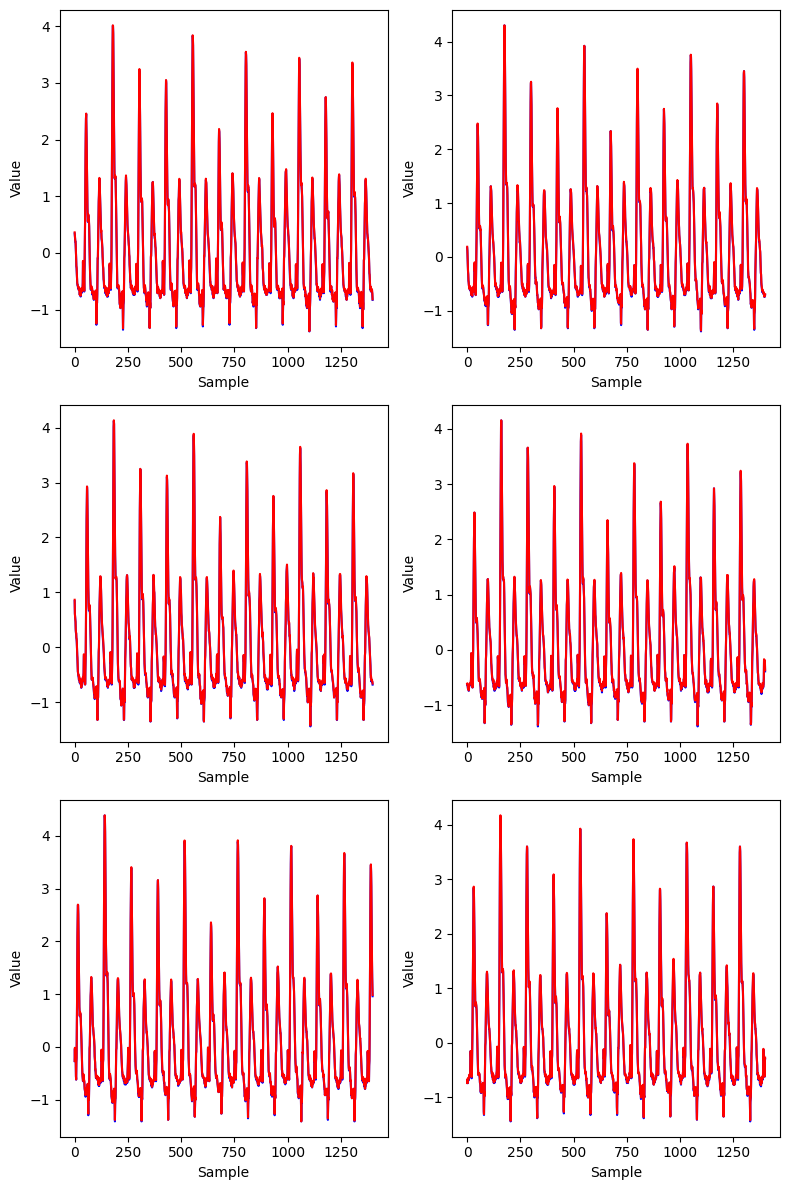

In [4]:
smooth_bins_transform = transforms.SmoothBins(1/dataset.data_stdev)
plot_samples(samples, [smooth_bins_transform(sample) for sample in samples])

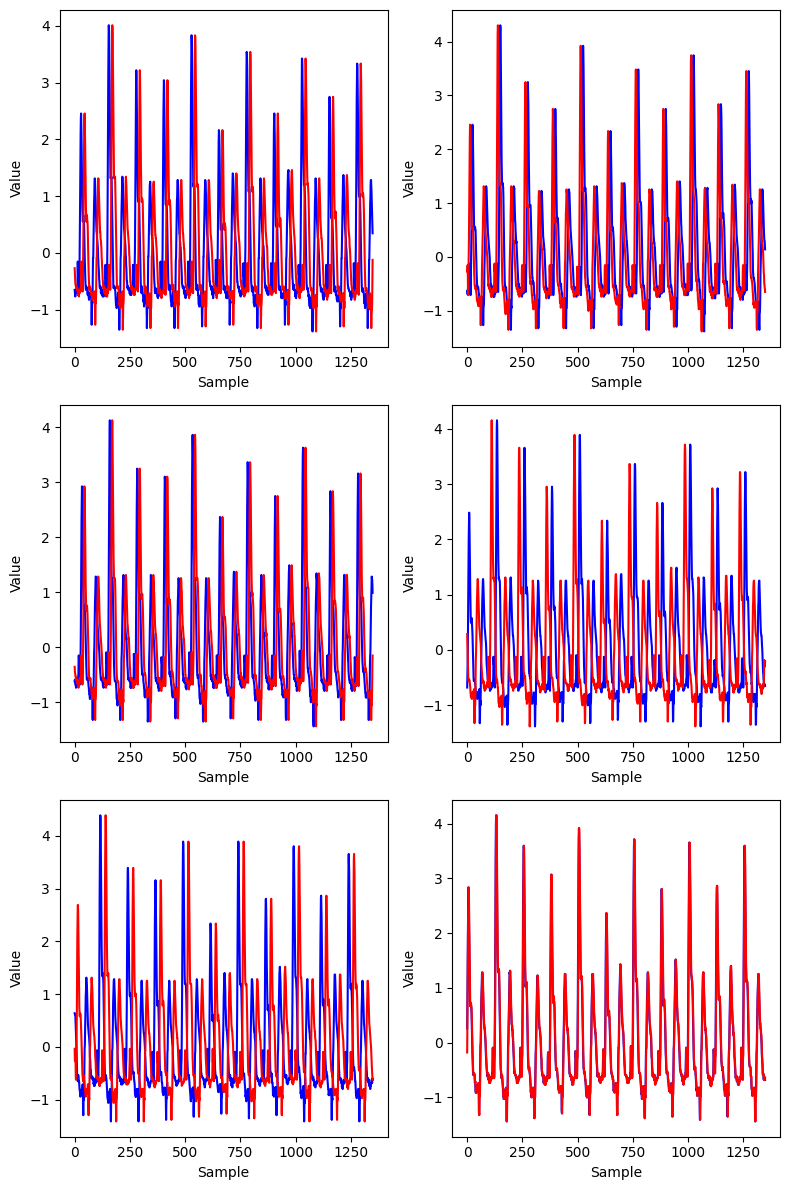

In [5]:
random_crop_transform = transforms.RandomCrop()
plot_samples([x[:, 25:-25] for x in samples], [random_crop_transform(x) for x in samples])

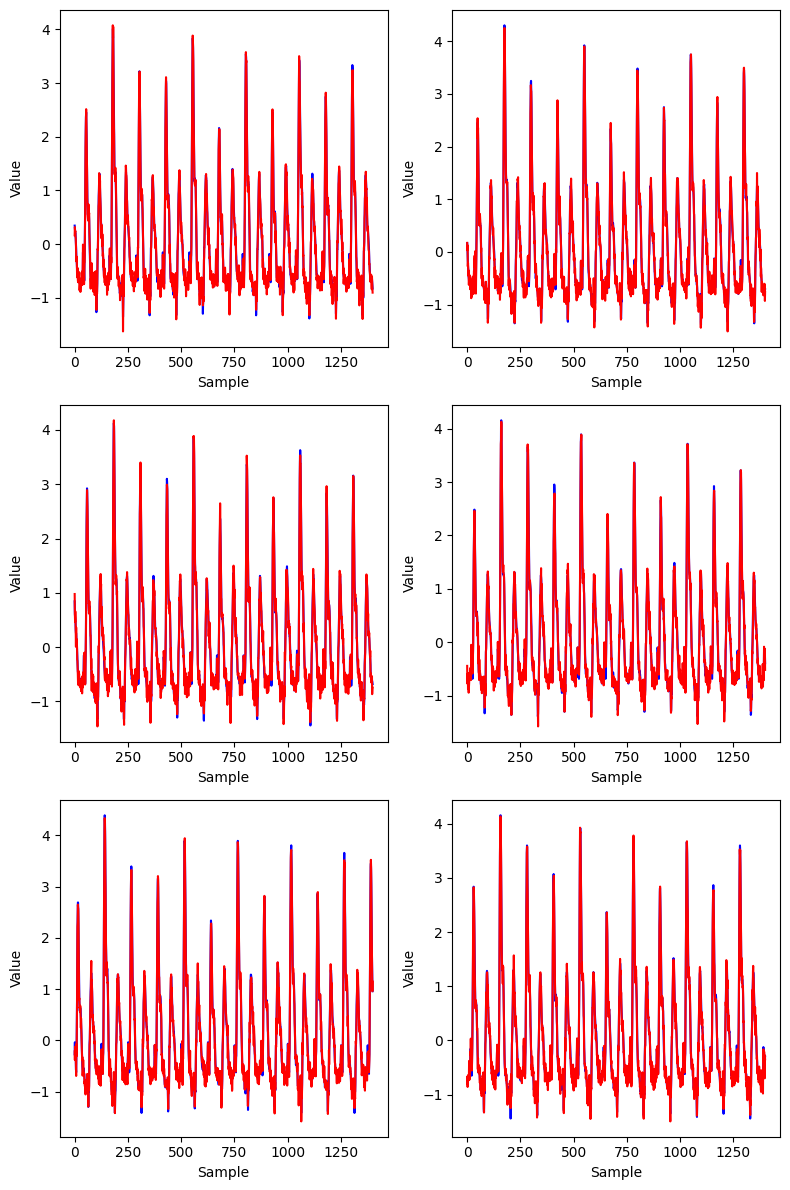

In [6]:
add_noise_transform = transforms.AddNoise(0.1)
plot_samples(samples, [add_noise_transform(x) for x in samples])

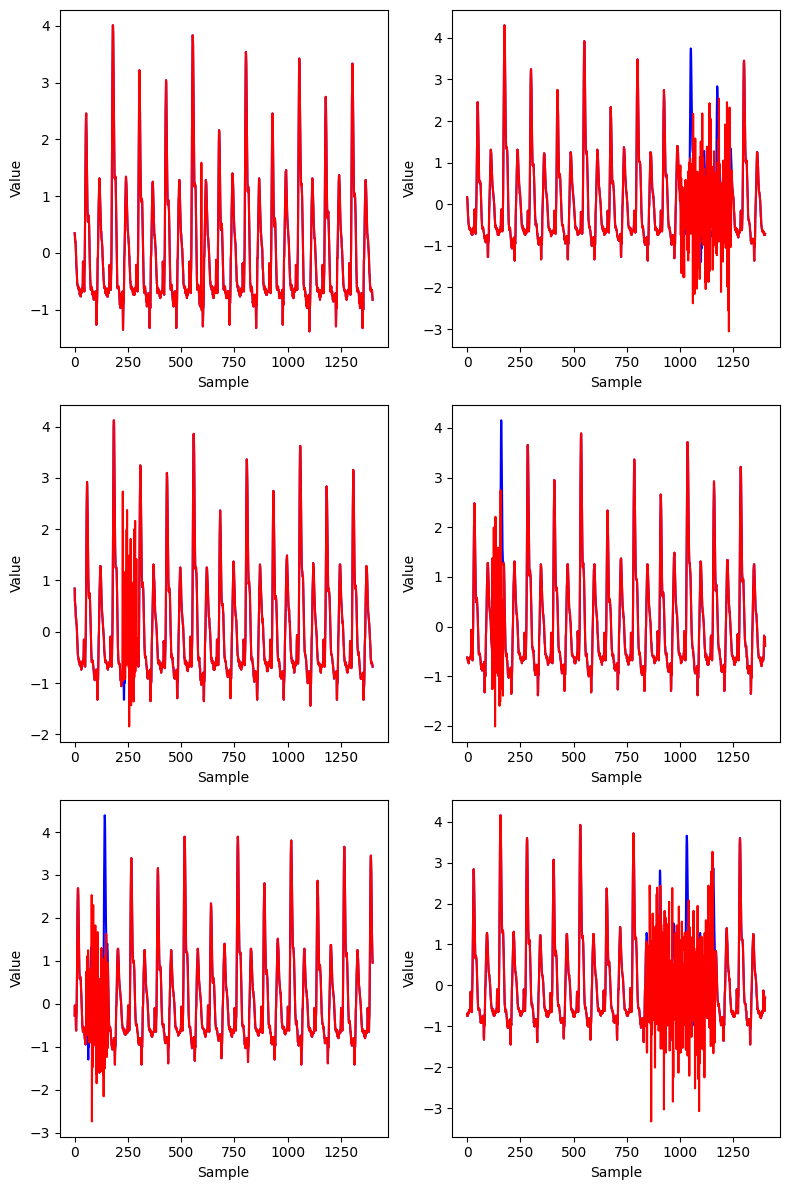

In [7]:
random_erasing_transform = transforms.RandomErasing(1)
plot_samples(samples, [random_erasing_transform(x) for x in samples])

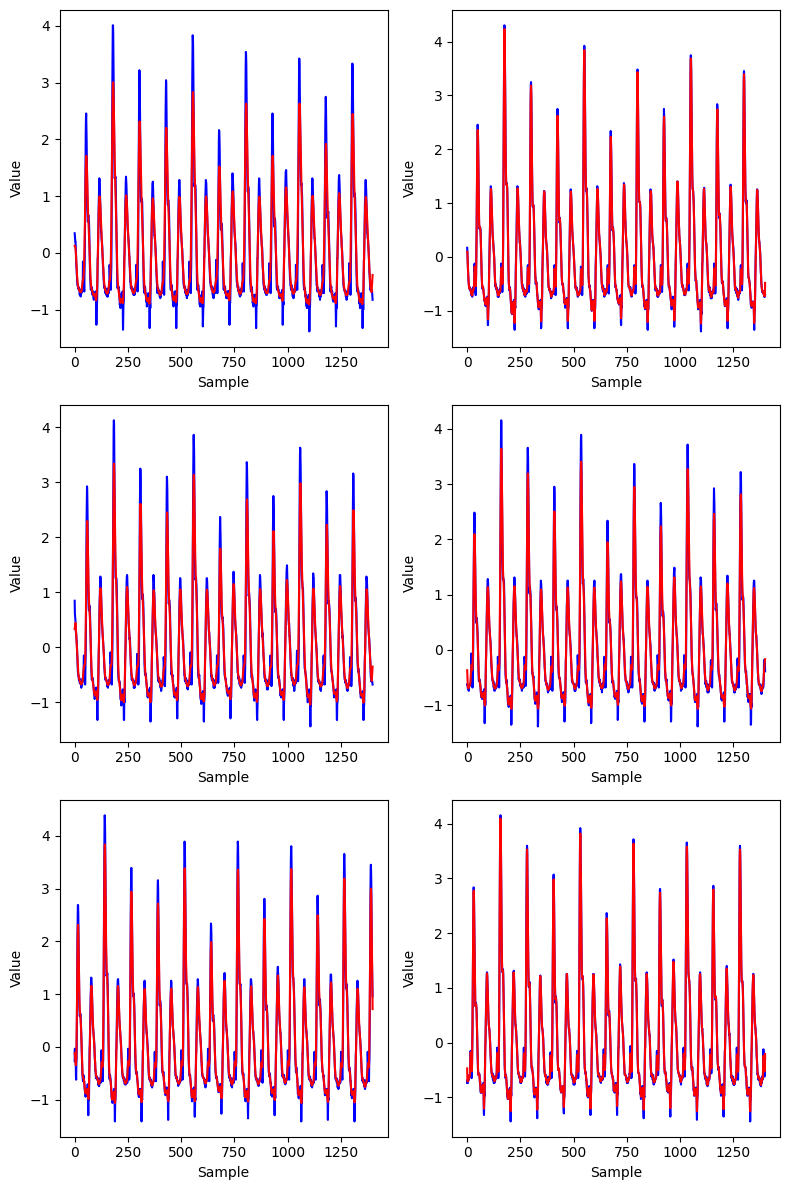

In [8]:
lpf_transform = transforms.RandomLowPassFilter(1)
plot_samples(samples, [lpf_transform(x) for x in samples])

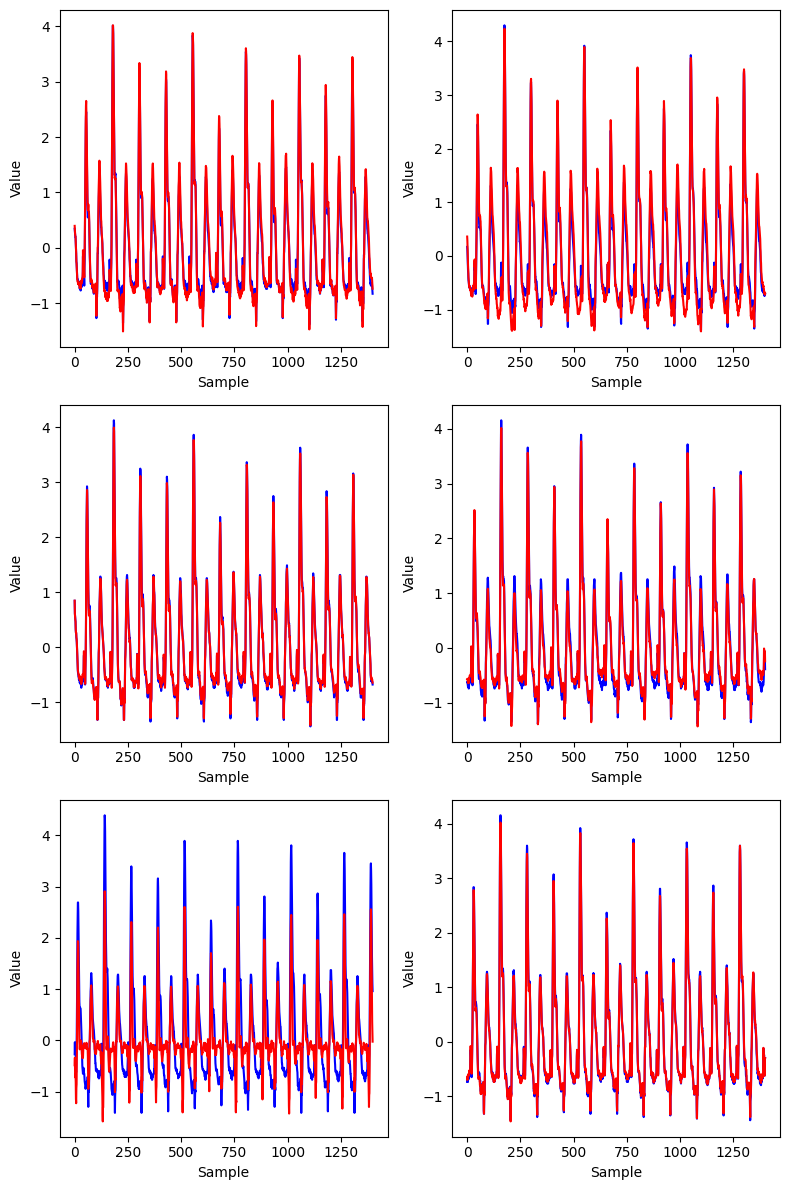

In [10]:
hpf_transform = transforms.RandomHighPassFilter(1)
plot_samples(samples, [hpf_transform(x) for x in samples])

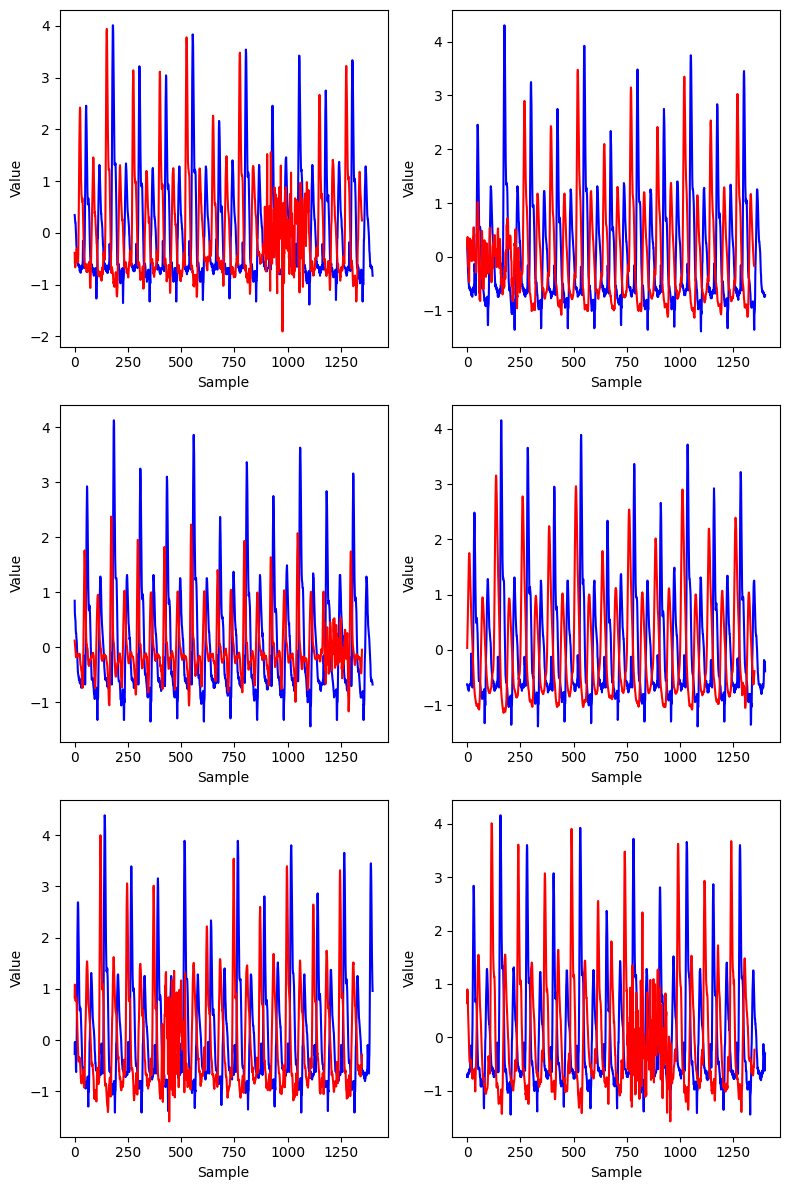

In [11]:
all_transforms = Compose([smooth_bins_transform, add_noise_transform, random_crop_transform, random_erasing_transform, lpf_transform, hpf_transform])
plot_samples(samples, [all_transforms(x) for x in samples])